# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [44]:
# your answer here
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby(["Department"])["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [5]:
# Method 2
# your answer here
employee.pivot_table(index = ["Department"], 
                     values = ["Salary"], 
                    ).rename(columns = {"Salary":"Mean Salary"})

,Mean Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary"], 
                    ).rename(columns = {"Salary":"Mean Salary"})

Mean Salary
Department Title                 
HR         VP                70.0
           analyst           32.5
IT         VP                70.0
           analyst           32.5
           associate         60.0
Sales      associate         55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
employee.pivot_table(index = ["Title"], 
                     values = ["Salary", "Years"],  
                     aggfunc = {"Salary":"mean", "Years":"sum"}
                    ).rename(columns ={"Salary":"Mean Salary", "Years":"Total Years"})

# assume the exercise asks for mean salary and total years of work experience

,Mean Salary,Total Years
Title,,
VP,70.000000,16
analyst,32.500000,9
associate,56.666667,12


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary"],
                     aggfunc = {"Salary":"mean", "Title":"count"}
                    ).rename(columns = {"Salary":"Mean Salary", "Title":"Number of Employees"})

Mean Salary  Number of Employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [97]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary"],  
                     aggfunc = {"Salary":["mean", "min", "max", "std"]}
                    )

# cannot return standard deviation when there is only 1 employee 

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60       NaN
Sales      associate     55  55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [98]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary"],  
                     aggfunc = {"Salary":["mean", "min", "max", "std"]}
                    ).fillna(0)

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60  0.000000
Sales      associate     55  55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [102]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary"], 
                     aggfunc = { "Salary":"sum", "Title":"count"}
                    ).rename(columns = {"Salary":"Salary Expenditure", "Title":"Number of Employees"})

Salary Expenditure  Number of Employees
Department Title                                             
HR         VP                         70                    1
           analyst                    65                    2
IT         VP                         70                    1
           analyst                    65                    2
           associate                  60                    1
Sales      associate                 110                    2

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [103]:
# your answer here
employee.pivot_table(index = ["Department", "Title"], 
                     values = ["Salary","Years"], 
                     aggfunc={"Salary":"mean", "Years":"sum"}
                    ).rename(columns = {"Salary":"Mean salary", "Years":"Total Years"})

Mean salary  Total Years
Department Title                              
HR         VP                70.0            8
           analyst           32.5            6
IT         VP                70.0            8
           analyst           32.5            3
           associate         60.0            7
Sales      associate         55.0            5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [14]:
# your answer here
def salary_adj(salaries):
    '''calculates the maximum salary then
    returns the adjusted mean salary where
    the maximum value is subtracted from the sum of salaries and divided by the number of salaries minus one'''
    salary_max = salaries.max()
    return (salaries.sum() - salary_max) / (salaries.count() - 1)

employee.pivot_table(index = ["Department"], 
                     values = ["Salary"], 
                     aggfunc = salary_adj
                    ).rename(columns = {"Salary":"Adjusted Mean Salary"})

,Adjusted Mean Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [49]:
# your answer here
fitbit = pd.read_csv("data/Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [17]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [18]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
stats.pearsonr(fitbit["Minutes Very Active"], fitbit["Steps"])

PearsonRResult(statistic=0.5714518481062599, pvalue=3.3572824994545705e-33)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

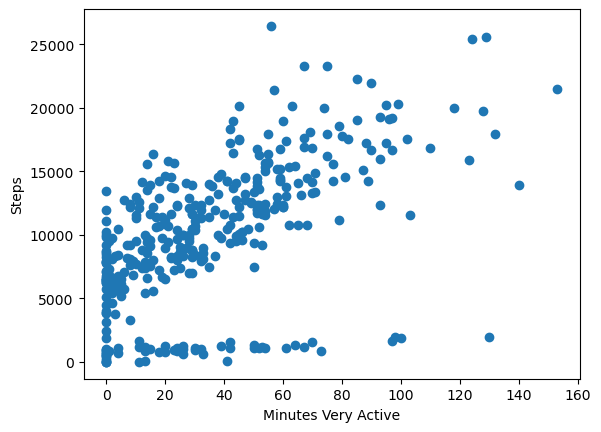

In [36]:
# your answer here
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [38]:
# your answer here
# A Pearson correlation coefficient of 0.57 suggests a moderate positive correlation between "Minutes Very Active" and "Steps"
# This correlation is not linear (as suspected)
# The p-value of 3.36*10^-33 is well below the significance threshold (0.05), indicating a statistically significant correlation

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [31]:
# your answer here
stats.pearsonr(fitbit["Minutes Sedentary"], fitbit["Steps"])

PearsonRResult(statistic=0.07690608062990095, pvalue=0.14143690593737201)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

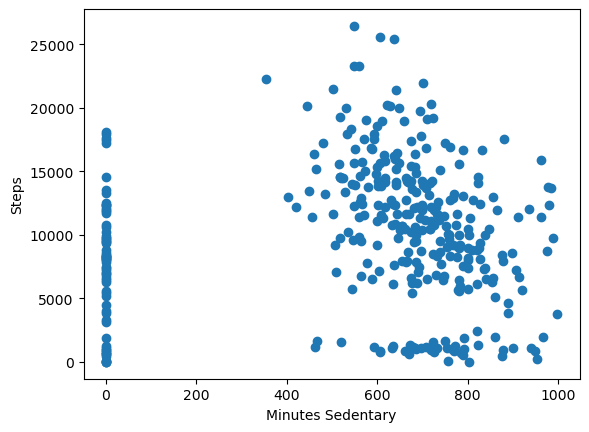

In [32]:
# your answer here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [ ]:
# A Pearson correlation coefficient of 0.08 suggests a weak positive correlation between "Minutes Sedentary" and "Steps"
# This correlation is definitely not linear (as suspected)
# The p-value of 0.14 is above the significance threshold (0.05), indicating a statistically insignificant correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [34]:
# your answer here
stats.pearsonr(fitbit["MinutesOfSleep"], fitbit["Steps"])

PearsonRResult(statistic=0.13098565950836383, pvalue=0.012018728392520099)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

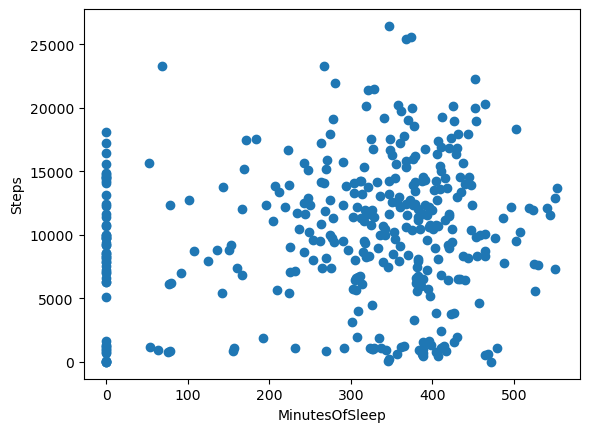

In [37]:
# your answer here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
# A Pearson correlation coefficient of 0.13 suggests a weak positive correlation between "Minutes Sedentary" and "Steps"
# This correlation is definitely not linear (as suspected)
# The p-value of 0.01 is below the significance threshold (0.05), indicating a statistically significant correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

<Axes: >

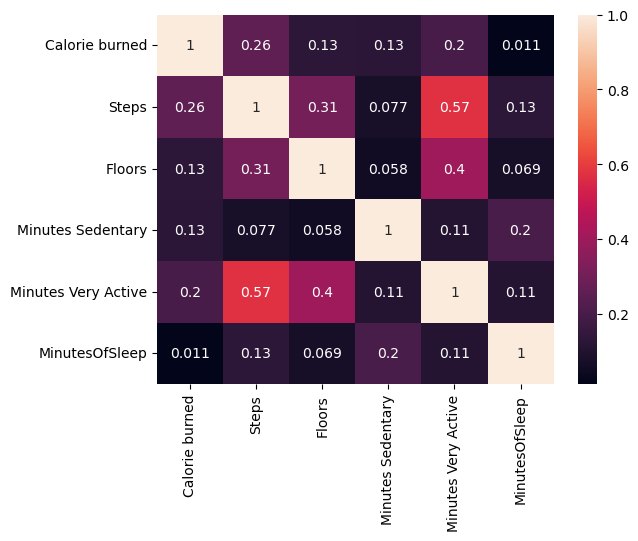

In [46]:
# your answer here
# select a subset of fitbit with the desired columns
column = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[column]
subset.head()

# compute the correlation matrix
cor_fit = subset.corr()

# convert the correlation matrix to a heatmap using seaborn
sns.heatmap(cor_fit, annot = True)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [48]:
# your answer here
cor_fit["Steps"].sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [55]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")
time_grades.head(20)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

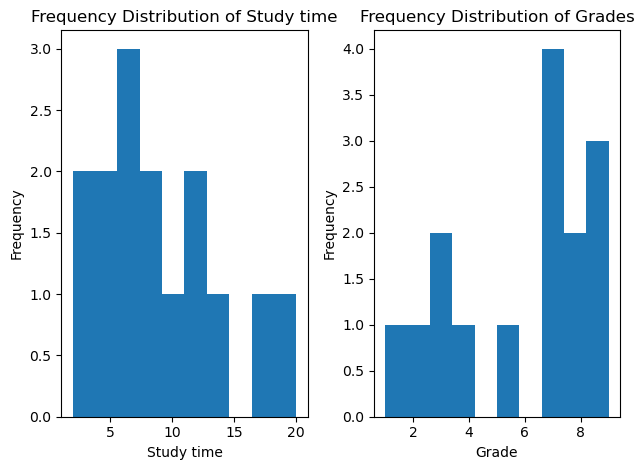

In [72]:
# your answer here

plt.subplot(1,2,1)
plt.hist(time_grades["Study time"], bins=10)
plt.xlabel("Study time")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Study time")

plt.subplot(1,2,2)
plt.hist(time_grades["Grade"], bins=10)
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Grades")

plt.tight_layout()
plt.show

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [76]:
# your answer here
print(stats.pearsonr(time_grades["Study time"], time_grades["Grade"]))
print(stats.spearmanr(time_grades["Study time"], time_grades["Grade"]))

PearsonRResult(statistic=0.7980456073578859, pvalue=0.0003627635256342718)
SignificanceResult(statistic=0.819658753036942, pvalue=0.00018377469445788485)


In [ ]:
# A Pearson correlation coefficient of 0.80 suggests a strong positive correlation between "Study time" and "Grade"
# The p-value of 0.0003 is well below the significance threshold (0.05), indicating a statistically significant correlation

# A Spearman correlation coefficient of 0.82 suggests a strong positive correlation between "Study time" and "Grade"
# The p-value of 0.0001 is well below the significance threshold (0.05), indicating a statistically significant correlation

# A close to linear, relatively monotonic relationship is expected between "Study time" and "Grade"

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

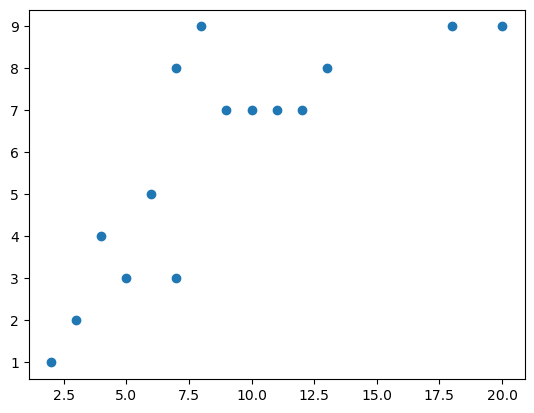

In [77]:
# your answer here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
# Pearson correlation measures the extent of the linear relationship of the two variables, while
# Spearman correlation measures the extent of the monotonic relationship